In [1]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


import prepare as pr 


In [2]:
df = pr.prep_data('all_books.csv')

In [4]:
save = df.copy()

In [13]:
save

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,Alice's Adventures in Wonderland: A Pop-Up Ada...,Alice's Adventures in Wonderland is Robert Sa...,2003,Robert Sabuda,157,26214,12.0,Classics,4.34,[],alice's adventures in wonderland a popup adapt...,alice's adventures in wonderland is robert sa...,False,alice adventure wonderland robert sabuda amaze...,0.000,0.627,0.373,0.9718,very positive
1,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811,very positive
2,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779,negative
4,Ralph S. Mouse by Beverly Cleary: Teacher Guide,"NOTE: This is not the book by Beverly Cleary, ...",2000,Gloria Levine,50,15889,28.0,Childrens,4.00,[],ralph s. mouse by beverly cleary teacher guide,"note this is not the book by beverly cleary, b...",False,note beverly cleary guide teacher accompany ti...,0.000,0.809,0.191,0.8570,very positive
7,The Hill We Climb: An Inaugural Poem for the C...,Librarian Note: Alternative Cover Edition for ...,2021,Amanda Gorman,2720,28125,29.0,Poetry,4.57,[],the hill we climb an inaugural poem for the co...,librarian note alternative cover edition for t...,False,librarian note alternative cover isbn january ...,0.000,0.784,0.216,0.9690,very positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,The Ink Black Heart,The latest installment in the highly acclaimed...,2022,Robert Galbraith,6016,54070,1408.0,Mystery,4.12,[],the ink black heart,the latest installment in the highly acclaimed...,False,latest installment highly acclaim internationa...,0.143,0.806,0.051,-0.9437,very negative
3851,The Fiery Cross,"The year is 1771, and war is coming. Jamie Fra...",2001,Diana Gabaldon,8425,199251,1443.0,Historical Fiction,4.25,NaN,the fiery cross,"the year is 1771, and war is coming. jamie fra...",False,year war come jamie frasers wife tell little w...,0.130,0.798,0.072,-0.7239,very negative
3852,War and Peace,Tolstoy's epic masterpiece intertwines the liv...,1869,Leo Tolstoy,15480,308202,1700.0,Classics,4.15,NaN,war and peace,tolstoy's epic masterpiece intertwines the liv...,False,tolstoy epic masterpiece intertwine life priva...,0.087,0.781,0.132,0.7430,very positive
3853,"The Norton Anthology of English Literature, Vo...",Firmly grounded by the hallmark strengths of a...,1962,M.H. Abrams,179,9045,2904.0,Classics,4.22,NaN,"the norton anthology of english literature, vo...",firmly grounded by the hallmark strengths of a...,False,firmly ground hallmark strength norton antholo...,0.000,0.874,0.126,0.8176,very positive


In [28]:
# df = save

# Clean DataFrame for Modeling

In [24]:
df['genre'] = df.genre.astype('object')

# create dummies

In [29]:
def ready_df(df):
    
    # drop columns we do not want to model on
    df = df.drop(columns= ['title','summary','year_published','author','reviews','cleaned_title','cleaned_summary'])
    
    # creating dummies for genre and sentient
    df['genre'] = df.genre.astype('object')
    dummy_df = pd.get_dummies(df[['genre','sentiment']], dummy_na=False, drop_first=[True, True])
    
    # add dummies to dataframe 
    df = pd.concat([df, dummy_df],axis= 1)
    
    return df
    

In [30]:
df = ready_df(df)

In [31]:
df

,review_count,number_of_ratings,length,genre,rating,successful,lemmatized_summary,neg,neutral,pos,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,157,26214,12.0,Classics,4.34,False,alice adventure wonderland robert sabuda amaze...,0.000,0.627,0.373,...,0,0,0,0,0,0,0,0,0,1
1,62,19212,24.0,Childrens,4.25,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,...,0,0,0,0,0,0,0,0,0,1
2,531,9155,25.0,Horror,4.01,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,...,0,0,0,0,0,0,0,0,0,0
4,50,15889,28.0,Childrens,4.00,False,note beverly cleary guide teacher accompany ti...,0.000,0.809,0.191,...,0,0,0,0,0,0,0,0,0,1
7,2720,28125,29.0,Poetry,4.57,False,librarian note alternative cover isbn january ...,0.000,0.784,0.216,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,6016,54070,1408.0,Mystery,4.12,False,latest installment highly acclaim internationa...,0.143,0.806,0.051,...,0,0,0,0,0,0,0,0,1,0
3851,8425,199251,1443.0,Historical Fiction,4.25,False,year war come jamie frasers wife tell little w...,0.130,0.798,0.072,...,0,0,0,0,0,0,0,0,1,0
3852,15480,308202,1700.0,Classics,4.15,False,tolstoy epic masterpiece intertwine life priva...,0.087,0.781,0.132,...,0,0,0,0,0,0,0,0,0,1
3853,179,9045,2904.0,Classics,4.22,False,firmly ground hallmark strength norton antholo...,0.000,0.874,0.126,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df = df.drop(columns= ['title','summary','year_published','author','reviews','cleaned_title','cleaned_summary'])

In [10]:
dummy_df = pd.get_dummies(df[['genre','sentiment']], dummy_na=False, drop_first=[True, True])
col_list = dummy_df.columns.tolist()

In [11]:
df = pd.concat([df, dummy_df],axis= 1)

# split

In [36]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection


In [37]:
def split(df, target):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df[target])
    return train, test

In [38]:
train, test = split(df,'successful')

In [426]:
x_train =  train.drop(columns= "successful")
y_train = train['successful']

In [427]:
x_test = test.drop(columns= "successful")
y_test = test['successful']

In [428]:
x_train = x_train.reset_index(drop= True)
y_train = y_train.reset_index(drop= True)

In [429]:

x_test = x_test.reset_index(drop= True)
y_test = y_test.reset_index(drop= True)

In [41]:
def Xandy_set(train,test):
    
    # creating train and test (x and y) subsets
    X_train =  train.drop(columns= "successful")
    y_train = train['successful']
    
    # creating train and test (x and y) subsets
    X_test = test.drop(columns= "successful")
    y_test = test['successful']
    
    # reset index, (no sorting or reordering)
    X_train = X_train.reset_index(drop= True)
    y_train = y_train.reset_index(drop= True)
    X_test = X_test.reset_index(drop= True)
    y_test = y_test.reset_index(drop= True)
    
    return X_train, y_train, X_test, y_test
    

In [42]:
X_train, y_train, X_test, y_test = Xandy_set(train,test)

In [342]:
import sklearn.preprocessing

In [45]:
def scaling(X_train, X_test):
    
    # create a subset of numerical column
    xtrainnums = X_train[['review_count','number_of_ratings','length','rating']]
    
    number_list = ['review_count','number_of_ratings','length','rating']

    # Note that we only call .fit with the training data
    scaler = sklearn.preprocessing.StandardScaler()
    
    # fit training data to scaler, not transforming here
    scaler.fit(xtrainnums)
    
    # transform the numerical values that we want based on the trained fit scaler
    X_train_scaled = scaler.transform(X_train[number_list])
    X_test_scaled = scaler.transform(X_test[number_list])
    
    # create a dataframe
    X_train_scaled = pd.DataFrame(X_train_scaled, columns= [number_list])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns= [number_list])
    
    
    # add the 'neg','neutral','pos','compound' from x_train to the scaled data. reset
    X_train_scaled[['neg','neutral','pos','compound']] = X_train[['neg','neutral','pos','compound']].reset_index(drop = True)
    X_test_scaled[['neg','neutral','pos','compound']] = X_test[['neg','neutral','pos','compound']].reset_index(drop = True)

    # create a list of the dummies 
    dummies = X_train.columns.tolist()[11:]
    
    # add dummies to dataframe
    X_train_scaled = pd.concat([X_train_scaled, X_train[dummies]],axis = 1 )
    X_test_scaled = pd.concat([X_test_scaled, X_test[dummies]],axis = 1 )


    
    
    return X_train_scaled, X_test_scaled
    

In [46]:
X_train_scaled, X_test_scaled = scaling(X_train, X_test)

# creating a min max scaler

In [267]:
xtrainnum = x_train.select_dtypes(exclude= ['string','object'])

In [268]:
xtrainnum = xtrainnum.drop(columns = ['neg','pos','neutral','compound'])

In [270]:
xtrainnum = xtrainnum[['review_count','number_of_ratings','length','rating']]

In [271]:
import sklearn.preprocessing

In [272]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(xtrainnum)


StandardScaler()

In [273]:
number_ls = xtrainnum.columns.tolist()

In [274]:
number_ls

['review_count', 'number_of_ratings', 'length', 'rating']

In [275]:
x_train_scaled = scaler.transform(x_train[number_ls])
x_test_scaled = scaler.transform(x_test[number_ls])

In [276]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= [number_ls])
x_test_scaled = pd.DataFrame(x_test_scaled, columns= [number_ls])

In [277]:
x_train_scaled[['neg','neutral','pos','compound']] = x_train[['neg','neutral','pos','compound']].reset_index(drop = True)

In [278]:
x_test_scaled[['neg','neutral','pos','compound']] = x_test[['neg','neutral','pos','compound']]

In [279]:
dummies = x_train.columns.tolist()[11:]

In [282]:
x_train_scaled = pd.concat([x_train_scaled, x_train[dummies]],axis = 1 )

In [283]:
x_train_scaled

,"(review_count,)","(number_of_ratings,)","(length,)","(rating,)","(neg,)","(neutral,)","(pos,)","(compound,)",genre_Business,genre_Chick Lit,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,-0.411491,-0.284079,0.168132,-0.359763,0.147,0.717,0.136,-0.0644,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.380954,-0.306387,0.583932,1.975819,0.234,0.702,0.064,-0.9918,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.362078,-0.284689,1.195403,0.167627,0.180,0.664,0.156,-0.9259,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.379408,-0.306298,0.119214,0.129956,0.126,0.818,0.056,-0.8074,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.218285,-0.207416,-0.223210,-0.472775,0.185,0.591,0.224,0.1531,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,-0.342364,-0.300816,-1.495069,-0.284421,0.030,0.720,0.250,0.9849,0,0,...,0,0,0,0,0,0,0,0,0,1
2944,5.212623,2.877707,0.510555,2.239513,0.125,0.788,0.087,-0.7436,0,0,...,0,0,0,0,0,0,0,0,1,0
2945,0.256904,-0.013444,0.125329,0.582004,0.105,0.796,0.099,-0.6124,0,0,...,0,0,0,0,0,0,0,0,1,0
2946,-0.370453,-0.270314,0.559473,0.016944,0.000,0.901,0.099,0.9153,0,0,...,0,0,0,0,0,0,0,0,0,1


In [284]:
x_test_scaled = pd.concat([x_test_scaled, x_test[dummies]],axis = 1 )

In [412]:
df

,review_count,number_of_ratings,length,genre,rating,successful,lemmatized_summary,neg,neutral,pos,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,157,26214,12.0,Classics,4.34,False,alice adventure wonderland robert sabuda amaze...,0.000,0.627,0.373,...,0,0,0,0,0,0,0,0,0,1
1,62,19212,24.0,Childrens,4.25,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,...,0,0,0,0,0,0,0,0,0,1
2,531,9155,25.0,Horror,4.01,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,...,0,0,0,0,0,0,0,0,0,0
3,701,17358,26.0,Picture Books,4.13,False,flock hapless sheep drive country rhyme picture,0.167,0.833,0.000,...,0,0,0,0,0,0,0,0,0,0
4,50,15889,28.0,Childrens,4.00,False,note beverly cleary guide teacher accompany ti...,0.000,0.809,0.191,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,6016,54070,1408.0,Mystery,4.12,False,latest installment highly acclaim internationa...,0.143,0.806,0.051,...,0,0,0,0,0,0,0,0,1,0
3851,8425,199251,1443.0,Historical Fiction,4.25,False,year war come jamie frasers wife tell little w...,0.130,0.798,0.072,...,0,0,0,0,0,0,0,0,1,0
3852,15480,308202,1700.0,Classics,4.15,False,tolstoy epic masterpiece intertwine life priva...,0.087,0.781,0.132,...,0,0,0,0,0,0,0,0,0,1
3853,179,9045,2904.0,Classics,4.22,False,firmly ground hallmark strength norton antholo...,0.000,0.874,0.126,...,0,0,0,0,0,0,0,0,0,1


# Baseline

In [59]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import recall_score


In [60]:
def XGBclf(X_train_scaled, X_test_scaled): 
    
    # create  an instance with predetermined values, using cross validation, grid search and other methods,
    # these parameters have been predetermined for the top performance. 
    xgb_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 7,
                                        learning_rate = .1,
                                        subsample = .7,
                                        colsample_bytree = .7,
                                        n_jobs = 10)
    
    most_imp = [('number_of_ratings',),
                'genre_Mystery',
                ('review_count',),
                 'genre_Nonfiction',
                'genre_Horror',
                 ('length',),
                 'genre_Fiction',
                 ('rating',),
                 'sentiment_very negative',
                 'genre_Young Adult',
                 'genre_Fantasy',
                 'genre_Romance',
                 ('neutral',),
                 ('neg',),
                 ('pos',),
                 ('compound',),
                 'sentiment_very positive',
                 'genre_Thriller']
    
    # fit the model with x_train, using the most important features, and y_train
    xgb_clf.fit(X_train_scaled[most_imp],y_train)
    
    # y predictions for test
    y_pred = xgb_clf.predict(X_test_scaled[most_imp])
    
    # assume y_test and y_pred are your test set target variable and predicted labels, respectively
    cm = confusion_matrix(y_test, y_pred)

    # plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Unsuccessful', 'Bestseller'])
    disp.plot()
    disp.ax_.set_title("Confusion Matrix for XGB Classifier")

    plt.show()
    
    return y_pred
    
    

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


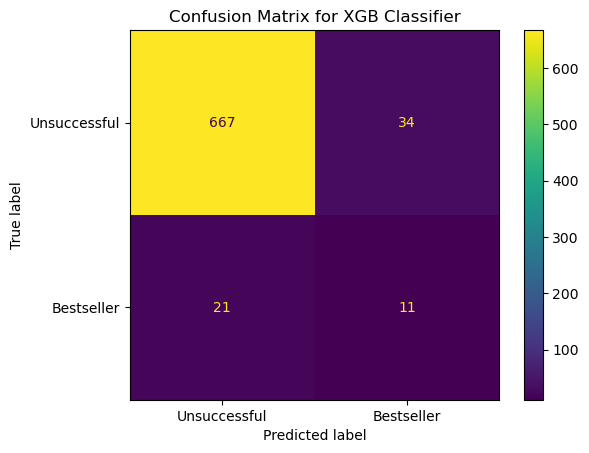

In [61]:
y_pred = XGBclf(X_train_scaled, X_test_scaled)

In [54]:
y_pred

NameError: name 'y_pred' is not defined

In [81]:
y_test = pd.DataFrame(y_test)

In [90]:
mode = y_test.mode()

In [91]:
y_test['baseline'] == mode

KeyError: 'baseline'

In [82]:
y_test['baseline'] == False

KeyError: 'baseline'

# XGBOOST 

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as m
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# import CV

# best xgb model

In [ ]:
'''max_depth=3, scale_pos_weight=7, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7: f1-score=0.39506172839506176,: recall-score=0.5


[[673  33]
 [ 16  16]]'''

In [303]:
# Whatever transformations we apply to X_train need to be applied to X_test
# create  an instance with predetermined values 
xgb_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 7,
                                        learning_rate = .1,
                                        subsample = .7,
                                        colsample_bytree = .7,
                                        n_jobs = 10)

In [304]:
xgb_clf.fit(x_train_scaled[most_imp],y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=10, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [305]:
y_pred = xgb_clf.predict(x_test_scaled[most_imp])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [308]:
print(confusion_matrix(y_test['successful'], y_pred))

[[673  33]
 [ 16  16]]


In [311]:
fpr, tpr, thresholds = roc_curve(y_test['successful'], y_test['baseline'])

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 

In [94]:
y_test

,successful
0,False
1,False
2,False
3,True
4,False
...,...
728,False
729,False
730,False
731,False


In [95]:
mode_val = y_test['successful'].mode()[0]

# Create a new column with the mode value
y_test = y_test.assign(baseline=mode_val)

In [99]:
y_test['baseline']

0      False
1      False
2      False
3      False
4      False
       ...  
728    False
729    False
730    False
731    False
732    False
Name: baseline, Length: 733, dtype: bool

In [120]:
def roc(y_test, y_pred):
    
    
    mode_val = y_test['successful'].mode()[0]

    # Create a new column with the mode value
    y_test = y_test.assign(baseline=mode_val)
    
    
    plt.figure(figsize=(10,6))


    fpr, tpr, thresholds = roc_curve(y_test['successful'], y_pred)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBClassifer (area = %0.4f)' % auc(fpr, tpr))

    fpr, tpr, thresholds = roc_curve(y_test['successful'], y_test['baseline'])
    plt.plot(fpr, tpr, color='red', lw=2, label=f'Baseline (area = %0.4f)' % auc(fpr, tpr))


    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('XGB Classifier Captured Area', fontsize=17)
    plt.legend(loc='lower right', fontsize=13)
    plt.show()

In [ ]:
'''# based on the most important feats
max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.9, colsample_bytree=0.7: f1-score=0.4444444444444445,: recall-score=0.5


[[682  24]
 [ 16  16]]'''

In [172]:
'''from tqdm import tqdm
from sklearn.model_selection import cross_val_score
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

# Define the number of folds for cross-validation
n_folds = 5

# Use tqdm to create a progress bar
with tqdm(total=n_folds) as pbar:
    # Pass the progress bar to the cv parameter of cross_val_score
    scores = cross_val_score(xgb_clf, x_train_long, y_train, cv=n_folds, verbose=1, n_jobs=-1)
    # Update the progress bar with each fold
    for i in range(n_folds):
        pbar.update(1)

# Print the cross-validation scores
print(scores)'''

'from tqdm import tqdm\nfrom sklearn.model_selection import cross_val_score\nimport xgboost as xgb\n\nxgb_clf = xgb.XGBClassifier()\n\n# Define the number of folds for cross-validation\nn_folds = 5\n\n# Use tqdm to create a progress bar\nwith tqdm(total=n_folds) as pbar:\n    # Pass the progress bar to the cv parameter of cross_val_score\n    scores = cross_val_score(xgb_clf, x_train_long, y_train, cv=n_folds, verbose=1, n_jobs=-1)\n    # Update the progress bar with each fold\n    for i in range(n_folds):\n        pbar.update(1)\n\n# Print the cross-validation scores\nprint(scores)'

In [72]:
def th_hyperparam_tuning(x_train, y_train, x_test, y_test, max_depths, scale_pos_weights, learning_rates, subsamples, colsample_bytrees):
    for max_depth in max_depths:
        for scale_pos_weight in scale_pos_weights:
            for learning_rate in learning_rates:
                for subsample in subsamples:
                    for colsample_bytree in colsample_bytrees:
                        # define the XGBClassifier with the current hyperparameters
                        xgb_model = xgb.XGBClassifier(objective ='binary:logistic', 
                                                  seed=42,
                                                  max_depth=max_depth,
                                                  scale_pos_weight=scale_pos_weight,
                                                  learning_rate=learning_rate,
                                                  subsample=subsample,
                                                  colsample_bytree=colsample_bytree,
                                                  n_jobs=10)
                        # fit the model on the training set
                        xgb_model.fit(x_train, y_train)
                        # predict on the test set
                        y_pred = xgb_model.predict(x_test)
                        # print the hyperparameters and the resulting f1-score
                        print(f"max_depth={max_depth}, scale_pos_weight={scale_pos_weight}, learning_rate={learning_rate}, subsample={subsample}, colsample_bytree={colsample_bytree}: f1-score={f1_score(y_test, y_pred)},: recall-score={recall_score(y_test, y_pred)}")
                        print('\n')
                        # print the confusion matrix
                        print(confusion_matrix(y_test, y_pred))
                        print('\n')
                        

In [73]:
max_depths = [3, 5, 7]
scale_pos_weights = [3, 5, 7]
learning_rates = [0.01, 0.1, 1]
subsamples = [0.7, 0.8, 0.9]
colsample_bytrees = [0.5, 0.6, 0.7]

In [ ]:
max_depth=3, scale_pos_weight=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.5: f1-score=0.3548387096774193,: recall-score=0.34375


[[682  19]
 [ 21  11]]


In [74]:
# calling function
th_hyperparam_tuning(X_train_scaled[most_imp], y_train, X_test_scaled[most_imp], y_test, max_depths, scale_pos_weights, learning_rates, subsamples, colsample_bytrees)


/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.7, colsample_bytree=0.5: f1-score=0.0,: recall-score=0.0


[[701   0]
 [ 32   0]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.7, colsample_bytree=0.6: f1-score=0.11764705882352941,: recall-score=0.0625


[[701   0]
 [ 30   2]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.7, colsample_bytree=0.7: f1-score=0.11428571428571428,: recall-score=0.0625


[[700   1]
 [ 30   2]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.5: f1-score=0.06060606060606061,: recall-score=0.03125


[[701   0]
 [ 31   1]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.6: f1-score=0.11764705882352941,: recall-score=0.0625


[[701   0]
 [ 30   2]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.7: f1-score=0.16666666666666666,: recall-score=0.09375


[[700   1]
 [ 29   3]]


max_depth

max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.8, colsample_bytree=0.7: f1-score=0.3076923076923077,: recall-score=0.25


[[689  12]
 [ 24   8]]


max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.9, colsample_bytree=0.5: f1-score=0.3111111111111111,: recall-score=0.21875


[[695   6]
 [ 25   7]]


max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.9, colsample_bytree=0.6: f1-score=0.3673469387755102,: recall-score=0.28125


[[693   8]
 [ 23   9]]


max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.9, colsample_bytree=0.7: f1-score=0.2745098039215686,: recall-score=0.21875


[[689  12]
 [ 25   7]]


max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.5: f1-score=0.3018867924528302,: recall-score=0.25


[[688  13]
 [ 24   8]]


max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.6: f1-score=0.2950819672131148,: recall-score=0.28125


[[681  20]
 [ 23   9]]


max_depth=

max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.7, colsample_bytree=0.6: f1-score=0.25,: recall-score=0.1875


[[691  10]
 [ 26   6]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.7, colsample_bytree=0.7: f1-score=0.18181818181818182,: recall-score=0.125


[[693   8]
 [ 28   4]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.8, colsample_bytree=0.5: f1-score=0.2857142857142857,: recall-score=0.21875


[[691  10]
 [ 25   7]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.8, colsample_bytree=0.6: f1-score=0.18604651162790697,: recall-score=0.125


[[694   7]
 [ 28   4]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.8, colsample_bytree=0.7: f1-score=0.25531914893617025,: recall-score=0.1875


[[692   9]
 [ 26   6]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.9, colsample_bytree=0.5: f1-score=0.26666666666666666,: recall-score=0.1875


[[694   7]
 [ 26   6]]


max_depth=5, scale_pos_weig

max_depth=5, scale_pos_weight=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.5: f1-score=0.2692307692307692,: recall-score=0.21875


[[688  13]
 [ 25   7]]


max_depth=5, scale_pos_weight=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.6: f1-score=0.2978723404255319,: recall-score=0.21875


[[693   8]
 [ 25   7]]


max_depth=5, scale_pos_weight=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.7: f1-score=0.24000000000000005,: recall-score=0.1875


[[689  12]
 [ 26   6]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.7, colsample_bytree=0.5: f1-score=0.24000000000000005,: recall-score=0.1875


[[689  12]
 [ 26   6]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.7, colsample_bytree=0.6: f1-score=0.3076923076923077,: recall-score=0.25


[[689  12]
 [ 24   8]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.7, colsample_bytree=0.7: f1-score=0.20408163265306123,: recall-score=0.15625


[[689  12]
 [ 27   5]]


max_de

max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7: f1-score=0.1951219512195122,: recall-score=0.125


[[696   5]
 [ 28   4]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.5: f1-score=0.24390243902439024,: recall-score=0.15625


[[697   4]
 [ 27   5]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.6: f1-score=0.24390243902439024,: recall-score=0.15625


[[697   4]
 [ 27   5]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7: f1-score=0.2325581395348837,: recall-score=0.15625


[[695   6]
 [ 27   5]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.5: f1-score=0.2325581395348837,: recall-score=0.15625


[[695   6]
 [ 27   5]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.6: f1-score=0.3111111111111111,: recall-score=0.21875


[[695   6]
 [ 25   7]]


In [ ]:
max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.9, colsample_bytree=0.6: f1-score=0.4313725490196078,: recall-score=0.34375


[[693   8]
 [ 21  11]]

In [ ]:
max_depth=3, scale_pos_weight=7, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7: f1-score=0.39506172839506176,: recall-score=0.5


[[673  33]
 [ 16  16]]

In [ ]:
max_depth=3, scale_pos_weight=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.6: f1-score=0.4375,: recall-score=0.4375


[[688  18]
 [ 18  14]]


In [ ]:
max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.7: f1-score=0.4411764705882353,: recall-score=0.46875


[[685  21]
 [ 17  15]]

# grid search

In [121]:
# from sklearn.metrics import make_scorer, recall_score

In [124]:
# from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2, 3, 4],
          'scale_pos_weight': [3,5,7],
          'learning_rate' : [0.01, 0.1, 1],
          'subsample' : [0.7, 0.8, 0.9],
          'colsample_bytree' : [0.5, 0.6, 0.7]
          }

xgb_model = xgb.XGBClassifier()

scorer = make_scorer(recall_score, average='macro')

grid = GridSearchCV(xgb_model, params,cv= 2 , scoring= scorer,  verbose = 3)

grid.fit(x_train_long, y_train)

# Print the results
print('Best params:', grid.best_params_)
print('Best recall:', grid.best_score_)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=3, subsample=0.7;, score=0.500 total time=  52.4s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=3, subsample=0.7;, score=0.500 total time=  51.3s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=3, subsample=0.8;, score=0.500 total time=  53.1s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=3, subsample=0.8;, score=0.500 total time=  51.8s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=3, subsample=0.9;, score=0.500 total time=  51.9s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=3, subsample=0.9;, score=0.500 total time=  52.4s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=2, scale_pos_weight=5, subsample=0.7;, score=0.500 total time=

KeyboardInterrupt: 

In [79]:
'''# create an instance with predetermined values 
clf_xgb = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 5,
                                        learning_rate = .01,
                                        subsample = .9,
                                        colsample_bytree = .5,
                                        n_jobs = 10)'''

In [175]:
clf_xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=10, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [176]:
len(clf_xgb.feature_importances_)

47

In [183]:
most_imp = feat_importances.nlargest(18).index.tolist()

In [69]:
most_imp = [('number_of_ratings',),
 'genre_Mystery',
 ('review_count',),
 'genre_Nonfiction',
 'genre_Horror',
 ('length',),
 'genre_Fiction',
 ('rating',),
 'sentiment_very negative',
 'genre_Young Adult',
 'genre_Fantasy',
 'genre_Romance',
 ('neutral',),
 ('neg',),
 ('pos',),
 ('compound',),
 'sentiment_very positive',
 'genre_Thriller']

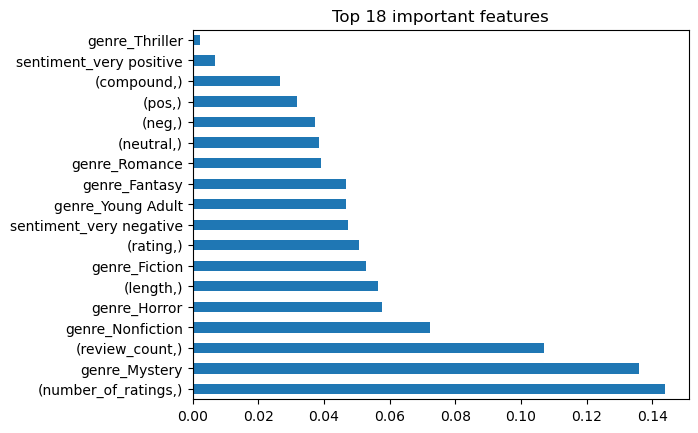

In [182]:
feat_importances = pd.Series(clf_xgb.feature_importances_, index= x_train_scaled.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.title("Top 18 important features")
plt.show()


In [ ]:
x_train_scaled[important_feats]

In [ ]:
'''max_depth=3, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.6: f1-score=0.4225352112676056,: recall-score=0.46875


[[682  24]
 [ 17  15]]'''

In [ ]:
'''max_depth=3, scale_pos_weight=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.5: f1-score=0.3880597014925374,: recall-score=0.40625
'''

In [ ]:
'''# based on the most important feats
max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.9, colsample_bytree=0.7: f1-score=0.4444444444444445,: recall-score=0.5


[[682  24]
 [ 16  16]]'''

# create a baseline

In [ ]:
baseline = y.mode()


# print confusion matrix 

# baseline

In [403]:
ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(y_test, y_pred), 
display_labels = ['unsuccessful', 'best seller'])
plt.show()


In [404]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

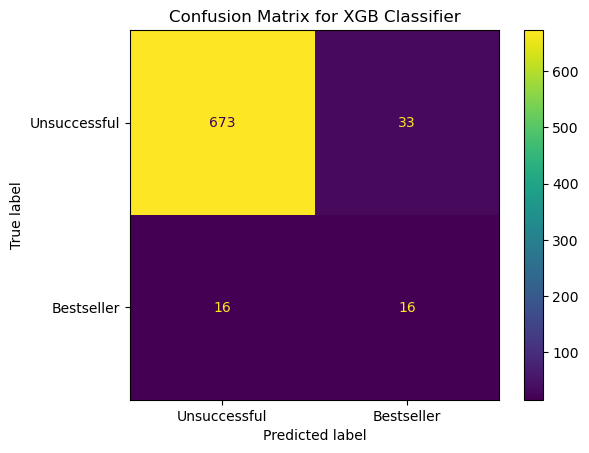

In [406]:
# assume y_test and y_pred are your test set target variable and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Unsuccessful', 'Bestseller'])
disp.plot()
disp.ax_.set_title("Confusion Matrix for XGB Classifier")

plt.show()

# create ruc_curve

# create bar charts, show difference.